<a href="https://colab.research.google.com/github/smrutisanchita/CE888/blob/main/Lab_6/Lab_6_excercise_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 6: Exercise to be completed

### Task 7: To complete this task, please create a new notebook in Google Colab. 

Note: Please create a new notebook for this task.

Your data is stored in Lab_6/Data folder. There are two .csv files: 1) Country-data.csv and 2) data-dictionary.csv. Please explore the data and use any clustering method to find the list of countries, which can categorised as follows:

| S.No      | Categories |
| ----------- | ----------- |
| 1   | under-developing country |
| 2   | developing country       |
| 3   | developed country        |


Note: please justify your reason, why and how you have concluded your answer. 

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
import seaborn as sns
from sklearn.decomposition import PCA,KernelPCA
from sklearn.preprocessing import StandardScaler

In [2]:
df_country = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv') # load the data into dataframe
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
x=df_country.iloc[:,1:].values #Take the input features excluding the country name (as its not significant for clustering)
country_name=df_country[['country','income','gdpp']].values

In [6]:
sc = StandardScaler() #Standarise the values as the input parameters are in various ranges 
X_std = sc.fit_transform(x)

### K-Means

In [12]:
km=cluster.KMeans(n_clusters=3)  # implementing k-means with clustersize as 3 
km.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
pd.Series(km.labels_).value_counts()  # checking the number of countries in each cluster

2    84
1    47
0    36
dtype: int64

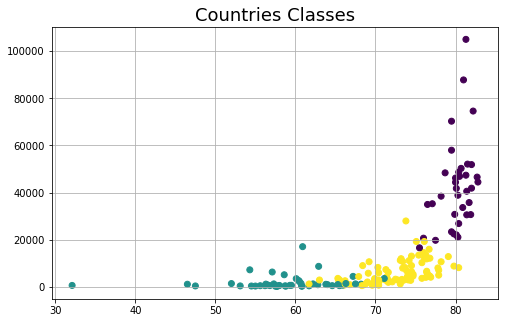

In [14]:
# plt.hist(km.labels_)
# plt.show()
# Have taken Income and gdpp in the plot to see the clusters
plt.figure(figsize=(8,5))
plt.title("Countries Classes", fontsize=18)
plt.grid(True)
plt.scatter(df_country.loc[:,'life_expec'],df_country.loc[:,'gdpp'],c=km.labels_)
plt.savefig('CountriesClass.png', dpi=300)
plt.show()

There are few countries which are wrongly clustered.

In [ ]:
# Fit DBSCAN Clustering 
dbs = cluster.DBSCAN(eps=0.00001) # The maximum distance between two samples for them to be considered as in the same neighborhood.
dbs.fit(X_std)
pd.Series(dbs.labels_).value_counts()

-1    167
dtype: int64

We can See that DBSCAN is not performing well for this.
Hence, we will try PCA on this dataset and check if it performs better.

In [ ]:
pca = PCA()
X_train_pca = pca.fit_transform(X_std)
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

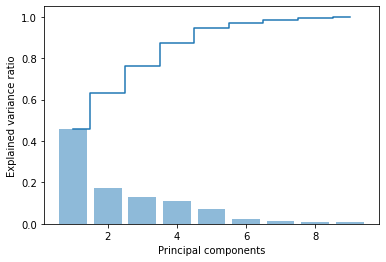

In [ ]:
plt.bar(range(1, 10), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 10), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.savefig('PCA_WINE.png', dpi=300)
plt.show()

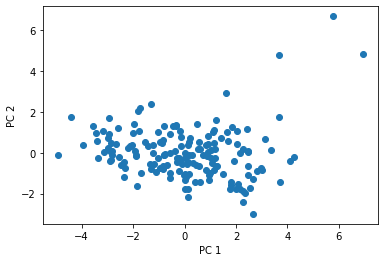

In [ ]:
pca = PCA(n_components=2)  # two component PCA just to plot the graph
X_pca = pca.fit_transform(X_std)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.savefig('PCA_country.png', dpi=300)
plt.show()

In [7]:
pca_5 = PCA(n_components=5) # As we can see that with 5 component, more than 90% of the Variance is explained, we will use component as 5
X_pca5 = pca_5.fit_transform(X_std)

              0             1             2             3             4
0  1.000000e+00 -3.238761e-16 -1.335610e-16 -3.461154e-16 -8.928921e-17
1 -3.238761e-16  1.000000e+00 -1.019843e-16 -9.514242e-17  5.574482e-17
2 -1.335610e-16 -1.019843e-16  1.000000e+00  6.638691e-17  6.709528e-16
3 -3.461154e-16 -9.514242e-17  6.638691e-17  1.000000e+00  6.650810e-16
4 -8.928921e-17  5.574482e-17  6.709528e-16  6.650810e-16  1.000000e+00


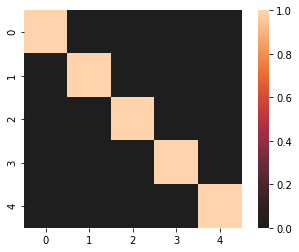

In [ ]:
#checking the co-relation between the input elements
kmp=pd.DataFrame(X_pca5)
corr_kpca=kmp.corr()
print(corr_kpca)
sns.heatmap(corr_kpca, vmax=1, center=0, square=True)
plt.savefig('KPCA_CORR.png', dpi=300)

In [8]:
km5=cluster.KMeans(n_clusters=3)
km5.fit(X_pca5)
pd.Series(km5.labels_).value_counts()

2    84
1    47
0    36
dtype: int64

we have got same result as without PCA. Hence will try kernal PCA

In [ ]:
scikit_kpca = KernelPCA(n_components=5, kernel='rbf', gamma=15)
kpca = scikit_kpca.fit_transform(X_std)

              0             1             2             3             4
0  1.000000e+00 -1.273922e-16 -1.266958e-16 -5.860233e-18 -6.946511e-17
1 -1.273922e-16  1.000000e+00  3.306709e-16 -9.203205e-19  5.200748e-17
2 -1.266958e-16  3.306709e-16  1.000000e+00  2.325391e-17 -7.631149e-18
3 -5.860233e-18 -9.203205e-19  2.325391e-17  1.000000e+00 -1.555276e-16
4 -6.946511e-17  5.200748e-17 -7.631149e-18 -1.555276e-16  1.000000e+00


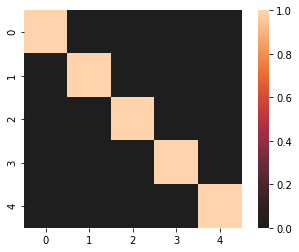

In [ ]:
#checking the co-relation between the input elements
kmp=pd.DataFrame(kpca)
corr_kpca=kmp.corr()
print(corr_kpca)
sns.heatmap(corr_kpca, vmax=1, center=0, square=True)
plt.savefig('KPCA_CORR.png', dpi=300)

In [ ]:
kmk=cluster.KMeans(n_clusters=3)
kmk.fit(kpca)
pd.Series(kmk.labels_).value_counts()
pd.Series(kmk.labels_).value_counts()

0    163
2      2
1      2
dtype: int64

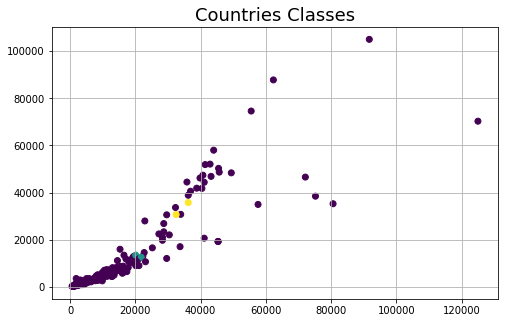

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Countries Classes", fontsize=18)
plt.grid(True)
plt.scatter(df_country.loc[:,'income'],df_country.loc[:,'gdpp'],c=kmk.labels_)
plt.savefig('CountriesClass.png', dpi=300)
plt.show()

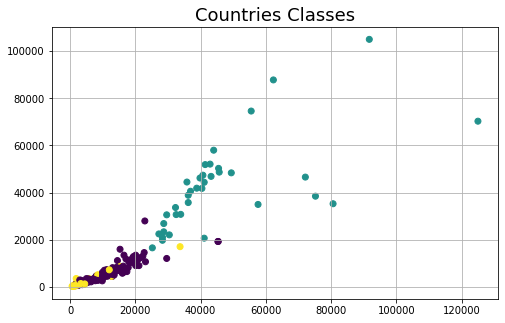

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Countries Classes", fontsize=18)
plt.grid(True)
plt.scatter(df_country.loc[:,'income'],df_country.loc[:,'gdpp'],c=kpca.labels_)
plt.savefig('CountriesClass.png', dpi=300)
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat = model.fit_predict(X_std)
pd.Series(yhat).value_counts()

1    106
0     34
2     27
dtype: int64

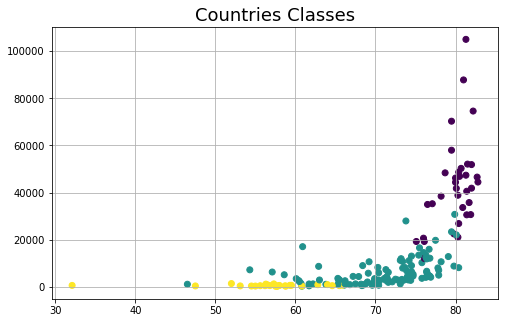

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Countries Classes", fontsize=18)
plt.grid(True)
plt.scatter(df_country.loc[:,'life_expec'],df_country.loc[:,'gdpp'],c=yhat)
plt.savefig('CountriesClass.png', dpi=300)
plt.show()

1    106
0     34
2     27
dtype: int64


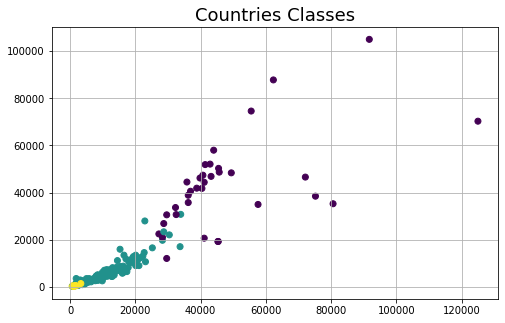

In [ ]:
from sklearn.cluster import Birch
modelb = Birch(threshold=0.01,n_clusters=3)
# fit model and predict clusters
y_birch = modelb.fit_predict(X_std)
print(pd.Series(y_birch).value_counts())
plt.figure(figsize=(8,5))
plt.title("Countries Classes", fontsize=18)
plt.grid(True)
plt.scatter(df_country.loc[:,'income'],df_country.loc[:,'gdpp'],c=yhat)
plt.savefig('CountriesClass.png', dpi=300)
plt.show()

In [ ]:
from sklearn.cluster import Birch
modelb = Birch(threshold=0.01,n_clusters=3)
# fit model and predict clusters
y_birch = modelb.fit_predict(X_std)
print(pd.Series(y_birch).value_counts())
plt.figure(figsize=(8,5))
plt.title("Countries Classes", fontsize=18)
plt.grid(True)
plt.scatter(df_country.loc[:,'income'],df_country.loc[:,'gdpp'],c=yhat)
plt.savefig('CountriesClass.png', dpi=300)
plt.show()

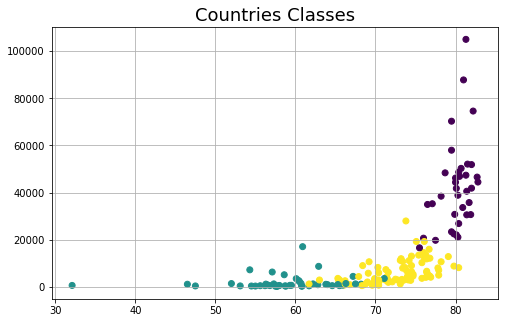

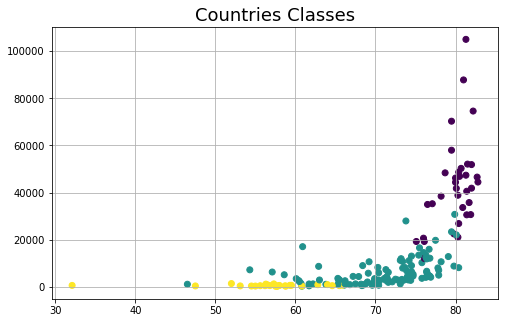

In [15]:
# plt.hist(km.labels_)
# plt.show()
# Have taken Income and gdpp in the plot to see the clusters
plt.figure(figsize=(8,5))
plt.title("Countries Classes", fontsize=18)
plt.grid(True)
plt.scatter(df_country.loc[:,'life_expec'],df_country.loc[:,'gdpp'],c=km.labels_)
plt.savefig('CountriesClass.png', dpi=300)
plt.show()

plt.figure(figsize=(8,5))
plt.title("Countries Classes", fontsize=18)
plt.grid(True)
plt.scatter(df_country.loc[:,'life_expec'],df_country.loc[:,'gdpp'],c=yhat)
plt.savefig('CountriesClass.png', dpi=300)
plt.show()


Looks like km gives a better result than agglomotive, Hence we would be using km for our final results


In [17]:
df_country_final=df_country.copy()
df_country_final['country_category'] = km.labels_

In [20]:
df_country_final.groupby(['country_category'])['gdpp'].sum()

country_category
0    1529800
1      90352
2     544862
Name: gdpp, dtype: int64

From Above , we can say that 0 is developed country, 1 is under-developing country and 2 is	developing country


In [24]:
df_country_final['country_category']= df_country_final['country_category'].astype(str)
df_country_final['country_category'].replace({"0": "developed country,", "1": "under-developing", "2": "developing country"}, inplace=True)

In [31]:
print(df_country_final['country_category'].value_counts())

developing country    84
under-developing      47
developed country,    36
Name: country_category, dtype: int64


In [32]:
df_country_final['country_category'].unique()

array(['under-developing', 'developing country', 'developed country,'],
      dtype=object)

In [33]:
print(df_country_final[['country','country_category']].sort_values(by=['country_category']))

             country    country_category
134  Slovak Republic  developed country,
23            Brunei  developed country,
82            Kuwait  developed country,
54            France  developed country,
53           Finland  developed country,
..               ...                 ...
80             Kenya    under-developing
72              Iraq    under-developing
66             Haiti    under-developing
88           Liberia    under-developing
166           Zambia    under-developing

[167 rows x 2 columns]
